## Question 1

In [11]:
import os
import prettytable as pt

In [2]:
def calculate_mean_sd(retrn_set, neg_retrn_set, nonneg_retrn_set):
    mean_retrn = sum(retrn_set) / len(retrn_set)
    sd_retrn = (sum([((x - mean_retrn) ** 2) for x in retrn_set]) / len(retrn_set)) ** 0.5
    
    mean_neg = sum(neg_retrn_set) / len(neg_retrn_set)
    sd_neg = (sum([((x - mean_neg) ** 2) for x in neg_retrn_set]) / len(neg_retrn_set)) ** 0.5
    
    mean_nonneg = sum(nonneg_retrn_set) / len(nonneg_retrn_set)
    sd_nonneg = (sum([((x - mean_nonneg) ** 2) for x in nonneg_retrn_set]) / len(nonneg_retrn_set)) ** 0.5
    return [mean_retrn, sd_retrn, len(neg_retrn_set), mean_neg, sd_neg, len(nonneg_retrn_set), mean_nonneg, sd_nonneg]

In [32]:
here = os.path.abspath('Assignment 1.ipynb')
input_dir = os.path.abspath(os.path.join(here, os.pardir))
ticker='Y'
ticker_file = os.path.join(input_dir, ticker + '.csv')

try:   
    with open(ticker_file) as f:
        lines = f.read().splitlines()
    print('opened file for ticker: ', ticker)
    
    # Define sets
    all_return, all_neg_return, all_nonneg_return = [], [], []
    mon_return, tue_return, wed_return, thu_return, fri_return = [], [], [], [], []
    mon_neg, tue_neg, wed_neg, thu_neg, fri_neg = [], [], [], [], []
    mon_nonneg, tue_nonneg, wed_nonneg, thu_nonneg, fri_nonneg = [], [], [], [], []
    
    # Find key information and their index
    year_ind = lines[0].split(',').index('Year')
    wkdy_ind = lines[0].split(',').index('Weekday')
    retrn_ind = lines[0].split(',').index('Return')
    
    # Put every returns into corresponding set
    for line in lines[1:]:
        current_year = line.split(',')[year_ind]
        current_wkdy = line.split(',')[wkdy_ind]
        current_retrn = float(line.split(',')[retrn_ind])
        all_return.append(current_retrn)
        if current_wkdy == 'Monday':
            mon_return.append(current_retrn)
        elif current_wkdy == 'Tuesday':
            tue_return.append(current_retrn)
        elif current_wkdy == 'Wednesday':
            wed_return.append(current_retrn)
        elif current_wkdy == 'Thursday':
            thu_return.append(current_retrn)
        elif current_wkdy == 'Friday':
            fri_return.append(current_retrn)     
                
        if current_retrn < 0:
            all_neg_return.append(current_retrn)
            if current_wkdy == 'Monday':
                mon_neg.append(current_retrn)
            elif current_wkdy == 'Tuesday':
                tue_neg.append(current_retrn)
            elif current_wkdy == 'Wednesday':
                wed_neg.append(current_retrn)
            elif current_wkdy == 'Thursday':
                thu_neg.append(current_retrn)
            elif current_wkdy == 'Friday':
                fri_neg.append(current_retrn)     
        else:
            all_nonneg_return.append(current_retrn)
            if current_wkdy == 'Monday':
                mon_nonneg.append(current_retrn)
            elif current_wkdy == 'Tuesday':
                tue_nonneg.append(current_retrn)
            elif current_wkdy == 'Wednesday':
                wed_nonneg.append(current_retrn)
            elif current_wkdy == 'Thursday':
                thu_nonneg.append(current_retrn)
            elif current_wkdy == 'Friday':
                fri_nonneg.append(current_retrn)     

        # See if lines still has next line
        if lines.index(line)+1 != len(lines):
            next_year = lines[lines.index(line)+1].split(',')[year_ind]
        else:
            next_year = -1
        # See if next line is in the same year
        if next_year != current_year:
            mon_stats = calculate_mean_sd(mon_return, mon_neg, mon_nonneg)
            tue_stats = calculate_mean_sd(tue_return, tue_neg, tue_nonneg)
            wed_stats = calculate_mean_sd(wed_return, wed_neg, wed_nonneg)
            thu_stats = calculate_mean_sd(thu_return, thu_neg, thu_nonneg)
            fri_stats = calculate_mean_sd(fri_return, fri_neg, fri_nonneg)
            mon_stats.insert(0,'Monday')
            tue_stats.insert(0,'Tuesday')
            wed_stats.insert(0,'Wednesday')
            thu_stats.insert(0,'Thursday')
            fri_stats.insert(0,'Friday')
            
            # Question1 Part2 print current year and show table for corresponding year
            print(current_year)
            table = pt.PrettyTable(['Day', 'µ(R)', 'σ(R)', '|R−|', 'µ(R-)', 'σ(R-)', '|R+|', 'µ(R+)', 'σ(R+)'])
            table.add_rows([mon_stats, tue_stats, wed_stats, thu_stats, fri_stats])
            print(table)

            # Question1 Part3 Are there more days with negative or non-negative returns?
            neg_day = len(all_neg_return)
            nonneg_day = len(all_nonneg_return)
            if neg_day < nonneg_day:
                print(f'Since negative day is {neg_day}, non-negative day is {nonneg_day}, there are more days with non-negative returns')
            elif neg_day > nonneg_day:
                print(f'Since negative day is {neg_day}, non-negative day is {nonneg_day}, there are more days with negative returns')
            else:
                print(f'Since negative day is {neg_day}, non-negative day is {nonneg_day}, there are same days with negative and non-negative returns')
            
            # Question1 Part4 Does your stock lose more on a ”down” day than it gains on an ”up” days.
            all_stats = calculate_mean_sd(all_return, all_neg_return, all_nonneg_return)
            print(f'Since average losing of down day is{all_stats[3]}, average earning of up day is{all_stats[6]}.')
            if all_stats[3] > all_stats[6]:
                print('My stock lose more on a down day than it gains on an up days')
            else:
                print('My stock gains more on a up day than it lose on a down days')
            
            # Question1 Part5
            
            # Initial all value for next year
            all_return, all_neg_return, all_nonneg_return = [], [], []
            mon_return, tue_return, wed_return, thu_return, fri_return = [], [], [], [], []
            mon_neg, tue_neg, wed_neg, thu_neg, fri_neg = [], [], [], [], []
            mon_nonneg, tue_nonneg, wed_nonneg, thu_nonneg, fri_nonneg = [], [], [], [], []

            
            
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)

opened file for ticker:  Y
2016
+-----------+-------------------------+----------------------+------+------------------------+----------------------+------+----------------------+-----------------------+
|    Day    |           µ(R)          |         σ(R)         | |R−| |         µ(R-)          |        σ(R-)         | |R+| |        µ(R+)         |         σ(R+)         |
+-----------+-------------------------+----------------------+------+------------------------+----------------------+------+----------------------+-----------------------+
|   Monday  | -0.00040684217341231254 | 0.009891133787249169 |  23  |  -0.00782364229195974  | 0.007046009381472826 |  23  | 0.007009957945135114 | 0.0060004132352489544 |
|  Tuesday  |  0.0009692185449976947  | 0.01115686771970263  |  25  | -0.0072018171723898395 | 0.007078791954155565 |  27  | 0.008534992357393559 |  0.008618139898733753 |
| Wednesday |   0.002185073206051288  | 0.008788833531046524 |  22  | -0.005594736552573037  | 0.00465200394

## Question 2

In [33]:
import os
import matplotlib.pyplot as plt

In [ ]:
def calculate_mean_sd(retrn_set, neg_retrn_set, nonneg_retrn_set):
    mean_retrn = sum(retrn_set) / len(retrn_set)
    sd_retrn = (sum([((x - mean_retrn) ** 2) for x in retrn_set]) / len(retrn_set)) ** 0.5
    
    mean_neg = sum(neg_retrn_set) / len(neg_retrn_set)
    sd_neg = (sum([((x - mean_neg) ** 2) for x in neg_retrn_set]) / len(neg_retrn_set)) ** 0.5
    
    mean_nonneg = sum(nonneg_retrn_set) / len(nonneg_retrn_set)
    sd_nonneg = (sum([((x - mean_nonneg) ** 2) for x in nonneg_retrn_set]) / len(nonneg_retrn_set)) ** 0.5
    return [mean_retrn, sd_retrn, len(neg_retrn_set), mean_neg, sd_neg, len(nonneg_retrn_set), mean_nonneg, sd_nonneg]

opened file for ticker:  Y


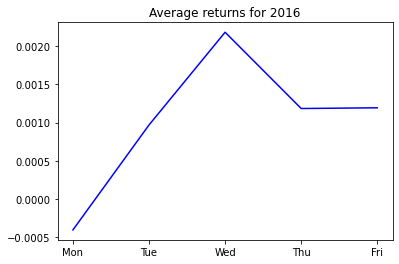

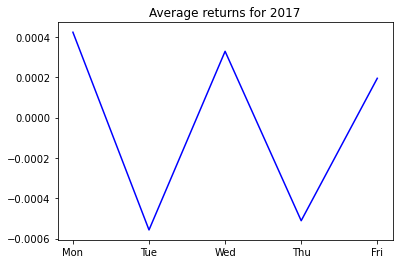

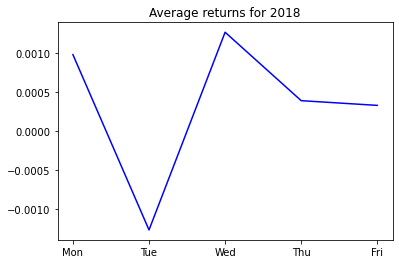

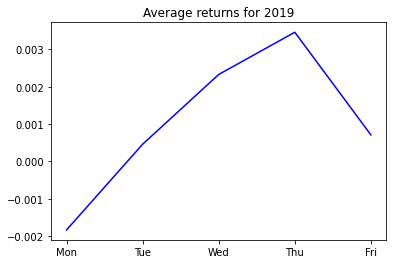

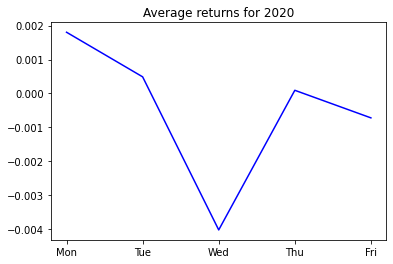

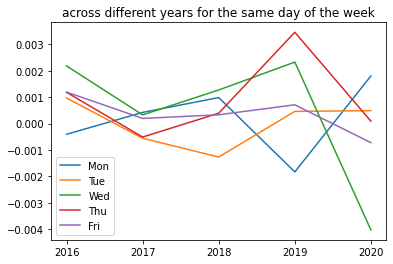

In [40]:
here = os.path.abspath('Assignment 1.ipynb')
input_dir = os.path.abspath(os.path.join(here, os.pardir))
ticker='Y'
ticker_file = os.path.join(input_dir, ticker + '.csv')

try:   
    with open(ticker_file) as f:
        lines = f.read().splitlines()
    print('opened file for ticker: ', ticker)
    
    # Define sets
    all_mon, all_tue, all_wed, all_thu, all_fri = [], [], [], [], []
    all_return, all_neg_return, all_nonneg_return = [], [], []
    mon_return, tue_return, wed_return, thu_return, fri_return = [], [], [], [], []
    mon_neg, tue_neg, wed_neg, thu_neg, fri_neg = [], [], [], [], []
    mon_nonneg, tue_nonneg, wed_nonneg, thu_nonneg, fri_nonneg = [], [], [], [], []
    
    # Find key information and their index
    year_ind = lines[0].split(',').index('Year')
    wkdy_ind = lines[0].split(',').index('Weekday')
    retrn_ind = lines[0].split(',').index('Return')
    
    # Put every returns into corresponding set
    for line in lines[1:]:
        current_year = line.split(',')[year_ind]
        current_wkdy = line.split(',')[wkdy_ind]
        current_retrn = float(line.split(',')[retrn_ind])
        all_return.append(current_retrn)
        if current_wkdy == 'Monday':
            mon_return.append(current_retrn)
        elif current_wkdy == 'Tuesday':
            tue_return.append(current_retrn)
        elif current_wkdy == 'Wednesday':
            wed_return.append(current_retrn)
        elif current_wkdy == 'Thursday':
            thu_return.append(current_retrn)
        elif current_wkdy == 'Friday':
            fri_return.append(current_retrn)     
                
        if current_retrn < 0:
            all_neg_return.append(current_retrn)
            if current_wkdy == 'Monday':
                mon_neg.append(current_retrn)
            elif current_wkdy == 'Tuesday':
                tue_neg.append(current_retrn)
            elif current_wkdy == 'Wednesday':
                wed_neg.append(current_retrn)
            elif current_wkdy == 'Thursday':
                thu_neg.append(current_retrn)
            elif current_wkdy == 'Friday':
                fri_neg.append(current_retrn)     
        else:
            all_nonneg_return.append(current_retrn)
            if current_wkdy == 'Monday':
                mon_nonneg.append(current_retrn)
            elif current_wkdy == 'Tuesday':
                tue_nonneg.append(current_retrn)
            elif current_wkdy == 'Wednesday':
                wed_nonneg.append(current_retrn)
            elif current_wkdy == 'Thursday':
                thu_nonneg.append(current_retrn)
            elif current_wkdy == 'Friday':
                fri_nonneg.append(current_retrn)     

        # See if lines still has next line
        if lines.index(line)+1 != len(lines):
            next_year = lines[lines.index(line)+1].split(',')[year_ind]
        else:
            next_year = -1
        # See if next line is in the same year
        if next_year != current_year:
            mon_stats = calculate_mean_sd(mon_return, mon_neg, mon_nonneg)
            tue_stats = calculate_mean_sd(tue_return, tue_neg, tue_nonneg)
            wed_stats = calculate_mean_sd(wed_return, wed_neg, wed_nonneg)
            thu_stats = calculate_mean_sd(thu_return, thu_neg, thu_nonneg)
            fri_stats = calculate_mean_sd(fri_return, fri_neg, fri_nonneg)
            mon_stats.insert(0,'Monday')
            tue_stats.insert(0,'Tuesday')
            wed_stats.insert(0,'Wednesday')
            thu_stats.insert(0,'Thursday')
            fri_stats.insert(0,'Friday')
            
            # Question2 Part1 are there any patterns across days of the week? 
            avg_all_returns = [mon_stats[1], tue_stats[1], wed_stats[1], thu_stats[1], fri_stats[1]]
            plt.plot(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], avg_all_returns, color='blue')
            plt.title(f'Average returns for {current_year}')
            plt.show()
            
            # Question2 Part2 are there any patterns across different years for the same day of the week?
            all_mon.append(mon_stats[1])
            all_tue.append(tue_stats[1])
            all_wed.append(wed_stats[1])
            all_thu.append(thu_stats[1])
            all_fri.append(fri_stats[1])
            
            
            # Initial all value for next year
            all_return, all_neg_return, all_nonneg_return = [], [], []
            mon_return, tue_return, wed_return, thu_return, fri_return = [], [], [], [], []
            mon_neg, tue_neg, wed_neg, thu_neg, fri_neg = [], [], [], [], []
            mon_nonneg, tue_nonneg, wed_nonneg, thu_nonneg, fri_nonneg = [], [], [], [], []

    # Question2 Part2 plot all returns across different years for the same day of the week
    plt.plot(['2016', '2017', '2018', '2019', '2020'], all_mon, label='Mon')
    plt.plot(['2016', '2017', '2018', '2019', '2020'], all_tue, label='Tue')
    plt.plot(['2016', '2017', '2018', '2019', '2020'], all_wed, label='Wed')
    plt.plot(['2016', '2017', '2018', '2019', '2020'], all_thu, label='Thu')
    plt.plot(['2016', '2017', '2018', '2019', '2020'], all_fri, label='Fri')
    plt.legend()
    plt.title('across different years for the same day of the week')
    plt.show()        
            
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)

## Question 3

In [42]:
import os
import prettytable as pt

In [43]:
def calculate_mean_sd(retrn_set, neg_retrn_set, nonneg_retrn_set):
    mean_retrn = sum(retrn_set) / len(retrn_set)
    sd_retrn = (sum([((x - mean_retrn) ** 2) for x in retrn_set]) / len(retrn_set)) ** 0.5
    
    mean_neg = sum(neg_retrn_set) / len(neg_retrn_set)
    sd_neg = (sum([((x - mean_neg) ** 2) for x in neg_retrn_set]) / len(neg_retrn_set)) ** 0.5
    
    mean_nonneg = sum(nonneg_retrn_set) / len(nonneg_retrn_set)
    sd_nonneg = (sum([((x - mean_nonneg) ** 2) for x in nonneg_retrn_set]) / len(nonneg_retrn_set)) ** 0.5
    return [mean_retrn, sd_retrn, len(neg_retrn_set), mean_neg, sd_neg, len(nonneg_retrn_set), mean_nonneg, sd_nonneg]

In [70]:
def calc_returns(input_dir, ticker):
    ticker_file = os.path.join(input_dir, ticker + '.csv')
    try:   
        with open(ticker_file) as f:
            lines = f.read().splitlines()
        print('opened file for ticker: ', ticker)

        # Define sets
        all_return, all_neg_return, all_nonneg_return = [], [], []
        mon_return, tue_return, wed_return, thu_return, fri_return = [], [], [], [], []
        mon_neg, tue_neg, wed_neg, thu_neg, fri_neg = [], [], [], [], []
        mon_nonneg, tue_nonneg, wed_nonneg, thu_nonneg, fri_nonneg = [], [], [], [], []

        # Find key information and their index
        year_ind = lines[0].split(',').index('Year')
        wkdy_ind = lines[0].split(',').index('Weekday')
        retrn_ind = lines[0].split(',').index('Return')

        # Put every returns into corresponding set
        for line in lines[1:]:
            current_year = line.split(',')[year_ind]
            current_wkdy = line.split(',')[wkdy_ind]
            current_retrn = float(line.split(',')[retrn_ind])
            all_return.append(current_retrn)
            if current_wkdy == 'Monday':
                mon_return.append(current_retrn)
            elif current_wkdy == 'Tuesday':
                tue_return.append(current_retrn)
            elif current_wkdy == 'Wednesday':
                wed_return.append(current_retrn)
            elif current_wkdy == 'Thursday':
                thu_return.append(current_retrn)
            elif current_wkdy == 'Friday':
                fri_return.append(current_retrn)     

            if current_retrn < 0:
                all_neg_return.append(current_retrn)
                if current_wkdy == 'Monday':
                    mon_neg.append(current_retrn)
                elif current_wkdy == 'Tuesday':
                    tue_neg.append(current_retrn)
                elif current_wkdy == 'Wednesday':
                    wed_neg.append(current_retrn)
                elif current_wkdy == 'Thursday':
                    thu_neg.append(current_retrn)
                elif current_wkdy == 'Friday':
                    fri_neg.append(current_retrn)     
            else:
                all_nonneg_return.append(current_retrn)
                if current_wkdy == 'Monday':
                    mon_nonneg.append(current_retrn)
                elif current_wkdy == 'Tuesday':
                    tue_nonneg.append(current_retrn)
                elif current_wkdy == 'Wednesday':
                    wed_nonneg.append(current_retrn)
                elif current_wkdy == 'Thursday':
                    thu_nonneg.append(current_retrn)
                elif current_wkdy == 'Friday':
                    fri_nonneg.append(current_retrn)  
        all_returns = [all_return, all_neg_return, all_nonneg_return] 
        all_week = [mon_return, tue_return, wed_return, thu_return, fri_return]
        week_neg = [mon_neg, tue_neg, wed_neg, thu_neg, fri_neg]
        week_nonneg = [mon_nonneg, tue_nonneg, wed_nonneg, thu_nonneg, fri_nonneg]
        return all_returns, all_week, week_neg, week_nonneg
        
    except Exception as e:
        print(e)
        print('failed to read stock data for ticker: ', ticker)
        
def print_table(mon_return, mon_neg, mon_nonneg, tue_return, tue_neg, tue_nonneg, wed_return, 
                wed_neg, wed_nonneg, thu_return, thu_neg, thu_nonneg, fri_return, fri_neg, fri_nonneg):        
    mon_stats = calculate_mean_sd(mon_return, mon_neg, mon_nonneg)
    tue_stats = calculate_mean_sd(tue_return, tue_neg, tue_nonneg)
    wed_stats = calculate_mean_sd(wed_return, wed_neg, wed_nonneg)
    thu_stats = calculate_mean_sd(thu_return, thu_neg, thu_nonneg)
    fri_stats = calculate_mean_sd(fri_return, fri_neg, fri_nonneg)
    mon_stats.insert(0,'Monday')
    tue_stats.insert(0,'Tuesday')
    wed_stats.insert(0,'Wednesday')
    thu_stats.insert(0,'Thursday')
    fri_stats.insert(0,'Friday')

    # Question3 print all 5 years and show table
    table = pt.PrettyTable(['Day', 'µ(R)', 'σ(R)', '|R−|', 'µ(R-)', 'σ(R-)', '|R+|', 'µ(R+)', 'σ(R+)'])
    table.add_rows([mon_stats, tue_stats, wed_stats, thu_stats, fri_stats])
    print(table)

In [72]:
here = os.path.abspath('Assignment 1.ipynb')
input_dir = os.path.abspath(os.path.join(here, os.pardir))
# Get the aggregate table data across all 5 years for both my stock and "SPY"
y_all, y_week, y_week_neg, y_week_nonneg = calc_returns(input_dir, 'Y')
print_table(y_week[0], y_week_neg[0], y_week_nonneg[0], y_week[1], y_week_neg[1], y_week_nonneg[1], y_week[2], 
            y_week_neg[2], y_week_nonneg[2], y_week[3], y_week_neg[3], y_week_nonneg[3], y_week[4], y_week_neg[4], 
            y_week_nonneg[4])

s_all, s_week, s_week_neg, s_week_nonneg = calc_returns(input_dir, 'SPY')
print_table(s_week[0], s_week_neg[0], s_week_nonneg[0], s_week[1], s_week_neg[1], s_week_nonneg[1], s_week[2], 
            s_week_neg[2], s_week_nonneg[2], s_week[3], s_week_neg[3], s_week_nonneg[3], s_week[4], s_week_neg[4], 
            s_week_nonneg[4])

opened file for ticker:  Y
+-----------+------------------------+----------------------+------+-----------------------+----------------------+------+----------------------+----------------------+
|    Day    |          µ(R)          |         σ(R)         | |R−| |         µ(R-)         |        σ(R-)         | |R+| |        µ(R+)         |        σ(R+)         |
+-----------+------------------------+----------------------+------+-----------------------+----------------------+------+----------------------+----------------------+
|   Monday  | 0.0001980165941740132  | 0.02068027349442558  | 121  | -0.011822234619438385 | 0.01715355163550013  | 115  | 0.012845411349366188 | 0.016002598739515993 |
|  Tuesday  | 2.6028116091964715e-05 | 0.016177176507314654 | 129  | -0.010316764693847706 | 0.010101969115197928 | 129  | 0.010368820926031638 | 0.014401582318430629 |
| Wednesday | 0.0004032250453086938  | 0.018480890338281365 | 110  | -0.012631697156504465 | 0.017326690797899592 | 147  | 0.010

## Question 4

In [76]:
import os

In [78]:
def money_calc(input_dir, ticker):
    ticker_file = os.path.join(input_dir, ticker + '.csv')
    try:   
        with open(ticker_file) as f:
            lines = f.read().splitlines()
        print('opened file for ticker: ', ticker)
        retrn_ind = lines[0].split(',').index('Return')
        
        # Define initial money
        money = 100

        for line in lines[1:]:
            current_retrn = float(line.split(',')[retrn_ind])
            # listen to Oracle so avoid all negative returns 
            if current_retrn >= 0:
                money *= 1+current_retrn
        return money
    except Exception as e:
        print(e)
        print('failed to read stock data for ticker: ', ticker)

In [79]:
here = os.path.abspath('Assignment 1.ipynb')
input_dir = os.path.abspath(os.path.join(here, os.pardir))
y_money = money_calc(input_dir, 'Y')
s_money = money_calc(input_dir, 'SPY')
print(f'For my stock, I will have {y_money} dollars on the last trading day of 2020')
print(f'For S&P-500 stock, I will have {s_money} dollars on the last trading day of 2020')

opened file for ticker:  Y
opened file for ticker:  SPY
For my stock, I will have 125983.85639775243 dollars on the last trading day of 2020
For S&P-500 stock, I will have 11985.076468564423 dollars on the last trading day of 2020


## Question 5

In [80]:
import os

In [81]:
def money_calc(input_dir, ticker):
    ticker_file = os.path.join(input_dir, ticker + '.csv')
    try:   
        with open(ticker_file) as f:
            lines = f.read().splitlines()
        print('opened file for ticker: ', ticker)
        retrn_ind = lines[0].split(',').index('Return')
        
        # Define initial money
        money = 100

        for line in lines[1:]:
            current_retrn = float(line.split(',')[retrn_ind])
            # Since we do not listen to Oracle so go through all returns 
            money *= 1+current_retrn
        return money
    except Exception as e:
        print(e)
        print('failed to read stock data for ticker: ', ticker)

In [82]:
here = os.path.abspath('Assignment 1.ipynb')
input_dir = os.path.abspath(os.path.join(here, os.pardir))
y_money = money_calc(input_dir, 'Y')
s_money = money_calc(input_dir, 'SPY')
print(f'For my stock, I will have {y_money} dollars on the last trading day of 2020')
print(f'For S&P-500 stock, I will have {s_money} dollars on the last trading day of 2020')

opened file for ticker:  Y
opened file for ticker:  SPY
For my stock, I will have 131.90063800699082 dollars on the last trading day of 2020
For S&P-500 stock, I will have 203.81486684670827 dollars on the last trading day of 2020


## Question 6

In [83]:
import os

In [118]:
def get_returns(input_dir, ticker):
    ticker_file = os.path.join(input_dir, ticker + '.csv')
    try:   
        with open(ticker_file) as f:
            lines = f.read().splitlines()
        print('opened file for ticker: ', ticker)
        retrn_ind = lines[0].split(',').index('Return')
        returns = []
        for line in lines[1:]:
            current_retrn = float(line.split(',')[retrn_ind])
            # Since we do not listen to Oracle so go through all returns 
            returns.append(current_retrn)
        sort_returns = sorted(returns)
        best_returns = sort_returns[-10:]
        worst_returns = sort_returns[:10]
        return returns, best_returns, worst_returns
    
    except Exception as e:
        print(e)
        print('failed to read stock data for ticker: ', ticker)

In [128]:
here = os.path.abspath('Assignment 1.ipynb')
input_dir = os.path.abspath(os.path.join(here, os.pardir))
y_returns, y_best_returns, y_worst_returns = get_returns(input_dir, 'Y')
# Question 6 part 1,a missed the best 10 days
# Define initial money
y_money = 100
for current_retrn in y_returns:
    if current_retrn > 0 and current_retrn not in y_best_returns:
        y_money *= 1+current_retrn
print(f'By missing the best 10 days, my stock will have {y_money} dollars on the last trading day of 2020')

s_returns, s_best_returns, s_worst_returns = get_returns(input_dir, 'SPY')
s_money = 100
for current_retrn in s_returns:
    if current_retrn >= 0 and current_retrn not in s_best_returns:
        s_money *= 1+current_retrn
print(f'By missing the best 10 days, S&P-500 stock will have {s_money} dollars on the last trading day of 2020')

# Question 6 part 1,b missed the worst 10 days
y_money = 100
for current_retrn in y_returns:
    if current_retrn >= 0 or current_retrn in y_worst_returns:
        y_money *= 1+current_retrn
print(f'By missing the worst 10 days, my stock will have {y_money} dollars on the last trading day of 2020')

s_money = 100
for current_retrn in s_returns:
    if current_retrn >= 0 or current_retrn in s_worst_returns:
        s_money *= 1+current_retrn
print(f'By missing the worst 10 days, S&P-500 stock will have {s_money} dollars on the last trading day of 2020')

# Question 6 part 1,c wrong results for best 5 days and for the worst 5 days
y_money = 100
for current_retrn in y_returns:
    if (current_retrn >= 0 and current_retrn not in y_best_returns[-5:]) or current_retrn in y_worst_returns[:5]:
        y_money *= 1+current_retrn
print(f'By getting wrong results for best 5 days and the worst 5 days, my stock will have {y_money} dollars on the last trading day of 2020')

s_money = 100
for current_retrn in s_returns:
    if (current_retrn >= 0 and current_retrn not in s_best_returns[-5:]) or current_retrn in s_worst_returns[:5]:
        s_money *= 1+current_retrn
print(f'By getting wrong results for best 5 days and the worst 5 days, S&P-500 stock will have {s_money} dollars on the last trading day of 2020')

opened file for ticker:  Y
By missing the best 10 days, my stock will have 56003.84267770594 dollars on the last trading day of 2020
opened file for ticker:  SPY
By missing the best 10 days, S&P-500 stock will have 6849.91547326207 dollars on the last trading day of 2020
By missing the worst 10 days, my stock will have 51430.549459777576 dollars on the last trading day of 2020
By missing the worst 10 days, S&P-500 stock will have 6333.209918469919 dollars on the last trading day of 2020
By getting wrong results for best 5 days and the worst 5 days, my stock will have 43116.014670398545 dollars on the last trading day of 2020
By getting wrong results for best 5 days and the worst 5 days, S&P-500 stock will have 5648.882716024927 dollars on the last trading day of 2020
